En este script se entrena y evalua un modelo de regresión utilizando **Gradient Boosting**. El dataset de imput para los modelos es el resultado del script p1. Las métricas que se utilizan para la evaluación de los modelos son $R^2$ y $MSE$ 

Al final del script se guarda el modelo final en un archivo *.pickel* que puede ser llamado desde otro script.

**CARGA DE LIBRERIAS**

In [1]:
import pandas as pd                         
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

**CARGA DE DATOS**

In [2]:
df= pd.read_csv('dataset_houses_model.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 13 columns):
banos                 10469 non-null float64
dormitorios           10469 non-null float64
garajes               10469 non-null float64
gastos_comunes        10469 non-null float64
m2_del_terreno        10469 non-null float64
m2_edificados         10469 non-null float64
price                 10469 non-null float64
vivienda_social       10469 non-null float64
disposición_frente    10469 non-null int64
estado_rec_exc        10469 non-null int64
zona_cat_1            10469 non-null int64
zona_cat_2            10469 non-null int64
zona_cat_3            10469 non-null int64
dtypes: float64(8), int64(5)
memory usage: 1.0 MB


**SEPARACIÓN DEL DATASET EN TRAIN Y TEST**

In [3]:
X = df.drop(columns=['price'])
y = df.price 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

**ENTRENAMIENTO DEL MODELO**

In [4]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [5]:
%%time
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)

Wall time: 6.96 s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
y_pred = gbr.predict(X_test)

In [7]:
print("R2 del modelo final: ", gbr.score(X_test, y_test))
print("MSE del modelo final: ", mean_squared_error(y_pred, y_test))

R2 del modelo final:  0.8193328576705369
MSE del modelo final:  3645030357.821115


**FEATURE IMPORTANCE**

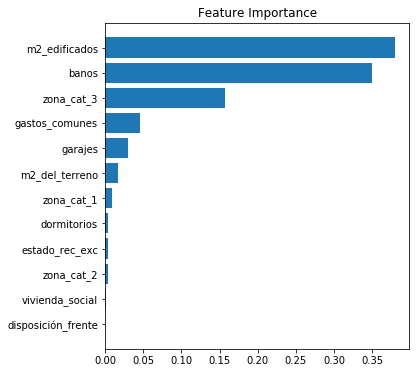

In [8]:
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()


**SE GUARDA EL MODELO FINAL EN UN .pickle FILE**

In [9]:
with open('model_final_gbr.pickle', 'wb') as pickle_file:
    pickle.dump(gbr, pickle_file)

"\nwith open('model_final_gbr.pickle', 'wb') as pickle_file:\n    pickle.dump(gbr, pickle_file)\n"